In [3]:
import tensorflow as tf
import pandas as pd

csv_path='/content/wheat_price.csv'

data = pd.read_csv(csv_path)
data.shape

(24, 7)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.dtypes


year                     int64
average_temperature    float64
rainfall               float64
crude_oil_price        float64
wheat_production         int64
inflation              float64
wheat_price              int64
dtype: object

In [7]:
numeric_feature_names=['year','average_temperature','rainfall','crude_oil_price','wheat_production','inflation','wheat_price']
numeric_features = data[numeric_feature_names]
numeric_features.head()
X_df = data.drop(columns=['year','wheat_price'],axis = 1)
y_df = data['wheat_price']

X_df.head(), y_df.head()

(   average_temperature  rainfall  crude_oil_price  wheat_production  inflation
 0                24.19   1187.06            14.42             66350      13.23
 1                24.94   1062.54            19.35             71288       4.67
 2                24.82   1041.99            30.38             76369       4.01
 3                24.71   1024.41            25.98             69681       3.78
 4                25.09    908.10            26.19             72766       4.30,
 0    475
 1    510
 2    550
 3    580
 4    610
 Name: wheat_price, dtype: int64)

In [8]:
tf_data = tf.convert_to_tensor(numeric_features)
X = tf.convert_to_tensor(X_df,dtype=tf.float32)
y= tf.expand_dims(tf.convert_to_tensor(y_df,dtype=tf.float32),axis=1)

X.shape, y.shape

(TensorShape([24, 5]), TensorShape([24, 1]))

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=42)
len(X_df),len(X_train), len(y_df), len(y_train)

(24, 19, 24, 19)

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), ['average_temperature','rainfall','crude_oil_price','wheat_production','inflation'])
)

X_df = data.drop(columns=['year','wheat_price'],axis=1)
y_df = data['wheat_price']

X_train,X_test, y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=42)
len(X_df),len(X_train), len(y_df), len(y_train)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [20]:
price_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
price_model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
price_model_1.fit(X_train_normal,y_train,epochs=1000,verbose=0)

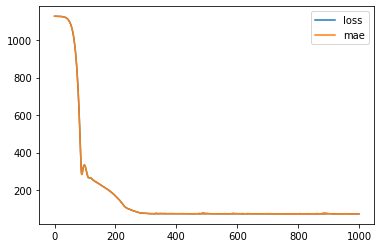

In [21]:
pd.DataFrame(price_model_1.history.history).plot()

In [22]:
price_model_1.evaluate(X_test_normal,y_test)

1/1 [==============================] - 0s 137ms/step - loss: 121.9183 - mae: 121.9183


[121.91828918457031, 121.91828918457031]

In [14]:
price_model_1.save('wheat_price_model.h5')

In [32]:
X_test_normal
price_model_1.predict(tf.expand_dims(X_test_normal[0],axis=0))

1/1 [==============================] - 0s 73ms/step


array([[731.45123]], dtype=float32)

In [35]:
X_test.loc[0], y_test[0]

(average_temperature       24.19
 rainfall                1187.06
 crude_oil_price           14.42
 wheat_production       66350.00
 inflation                 13.23
 Name: 0, dtype: float64, 475)

In [47]:
predict_df = pd.DataFrame({'average_temperature':[24.19],'rainfall':[1187.06],'crude_oil_price':[14.42],'wheat_production':[66350.00],'inflation':[13.23]})
predict_df

predictData_normal= ct.transform(predict_df)
predictData_normal
price_model_1.predict(predictData_normal)

1/1 [==============================] - 0s 22ms/step


array([[431.30524]], dtype=float32)